In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#Text Preprocessing
import re
import string
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv(r"D:\DEPI Data Engineer\__ Graduation Project\Data\data.csv")

### **Data Exploration**

In [4]:
df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

Data Contains Null values, We can handle it.

# **1. Handle Missing Values:**

In [6]:
# find total number of rows

total_rows = df.shape[0]
total_rows

602130

Camparing missin values with the total number  of rows concluded that missing values are not a small number to drop them. instead, we are going to handle with them.
We are going to fill them with statstical values like: (mean, median, mode, ...)

In [7]:
# handle is_recommended column for missing values
# group the rows based on product name, then fill the missing values with mode depending of the values of the product name it has

df['is_recommended'].fillna(df.groupby('product_name')['is_recommended'].fillna('mode').iloc[0], inplace=True)

In [8]:
# handle helpfulness column for missing vlalues
# group the rows based on product name, then fill the missing values with mode depending of the values of the product name it has

df['helpfulness'].fillna(df.groupby('product_name')['helpfulness'].fillna('mode').iloc[0], inplace=True)

In [9]:
df['review_title'].head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            602130 non-null  float64
 4   helpfulness               602130 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

In [10]:
# drop columns that don't have review text

df.dropna(subset=['review_text'], inplace=True)

In [11]:
# fill missing vslues in 'skin_tone', 'eye_color', 'skin_type' by the mode value for each column

df['skin_tone'].fillna(df['skin_tone'].mode().iloc[0], inplace=True)
df['eye_color'].fillna(df['eye_color'].mode().iloc[0], inplace=True)
df['skin_type'].fillna(df['skin_type'].mode().iloc[0], inplace=True)
df['hair_color'].fillna(df['hair_color'].mode().iloc[0], inplace=True)

In [12]:
# fill missing values in 'review_title' by 'No_title' value

df['review_title'].fillna('No_title', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601131 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                601131 non-null  int64  
 1   author_id                 601131 non-null  object 
 2   rating                    601131 non-null  int64  
 3   is_recommended            601131 non-null  float64
 4   helpfulness               601131 non-null  float64
 5   total_feedback_count      601131 non-null  int64  
 6   total_neg_feedback_count  601131 non-null  int64  
 7   total_pos_feedback_count  601131 non-null  int64  
 8   submission_time           601131 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              601131 non-null  object 
 11  skin_tone                 601131 non-null  object 
 12  eye_color                 601131 non-null  object 
 13  skin_type                 601131 non-null  object

# **2. Handle Outliers**

### **i. Check outliers in numerical values**

In [13]:
# 'rating': just to be from 1 to 5, any number out of this range is outlier. we should find it and see the values  

# Identify outliers: ratings not between 1 and 5
outliers = df[(df['rating'] < 1) | (df['rating'] > 5)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Unnamed: 0, author_id, rating, is_recommended, helpfulness, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, review_title, skin_tone, eye_color, skin_type, hair_color, product_id, product_name, brand_name, price_usd]
Index: []


##### no outliers here

### **ii. Check outliers in categorical values**

### Identify outliers: values not equal to 0 or 1

In [ ]:
outliers = df[(df['is_recommended'] != 0) & (df['is_recommended'] != 1)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Unnamed: 0, author_id, rating, is_recommended, helpfulness, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, review_title, skin_tone, eye_color, skin_type, hair_color, product_id, product_name, brand_name, price_usd]
Index: []


Skin Type, Skin tones, eye color, hair color columns handling

In [15]:
df['skin_tone'].unique()

array(['light', 'lightMedium', 'fairLight', 'fair', 'medium', 'notSureST',
       'mediumTan', 'tan', 'rich', 'olive', 'deep', 'porcelain', 'dark',
       'ebony'], dtype=object)

In [16]:
df['skin_type'].unique()

array(['dry', 'combination', 'normal', 'oily'], dtype=object)

In [17]:
df['eye_color'].unique()

array(['brown', 'hazel', 'blue', 'green', 'gray', 'Grey'], dtype=object)

Handle grey and gray 

In [18]:
df['eye_color'] = df['eye_color'].str.lower().replace('Grey', 'gray')

In [19]:
df['hair_color'].unique()

array(['black', 'brown', 'blonde', 'brunette', 'gray', 'auburn', 'red'],
      dtype=object)

# **3. Handle Duplicate Data:**

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601131 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                601131 non-null  int64  
 1   author_id                 601131 non-null  object 
 2   rating                    601131 non-null  int64  
 3   is_recommended            601131 non-null  float64
 4   helpfulness               601131 non-null  float64
 5   total_feedback_count      601131 non-null  int64  
 6   total_neg_feedback_count  601131 non-null  int64  
 7   total_pos_feedback_count  601131 non-null  int64  
 8   submission_time           601131 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              601131 non-null  object 
 11  skin_tone                 601131 non-null  object 
 12  eye_color                 601131 non-null  object 
 13  skin_type                 601131 non-null  object

In [22]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,601131.000000,601131.000000,601131.000000,601131.000000,601131.000000,601131.000000,601131.000000,601131.000000
mean,301125.163397,4.311671,0.869563,0.896792,3.664965,0.765169,2.899796,45.730590
std,173795.372953,1.143659,0.336784,0.242194,25.868423,4.966716,22.647383,35.753886
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,150620.500000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,23.500000
50%,301147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,38.000000
75%,451623.500000,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,60.000000
max,602129.000000,5.000000,1.000000,1.000000,5464.000000,573.000000,5050.000000,380.000000


through observation, I find outliers in the price_usd

In [23]:
df.groupby('brand_name').agg(
    min_price=('price_usd', 'min'),
    max_price=('price_usd', 'max'),
    product_count=('product_id', 'nunique')
).reset_index()

,brand_name,min_price,max_price,product_count
0,Algenist,68.00,115.00,3
1,Biossance,60.00,74.00,2
2,Bobbi Brown,66.00,66.00,1
3,CLINIQUE,14.00,82.00,13
4,Caudalie,12.00,82.00,5
5,Charlotte Tilbury,100.00,100.00,1
6,Clarins,90.00,90.00,1
7,Dermalogica,15.00,65.00,4
8,Dior,130.00,130.00,1
9,Dr. Brandt Skincare,54.00,54.00,1


# **4. Convert Data Types**

In [24]:
# Changing the data types based on the descriptions
df['author_id'] = df['author_id'].astype(str)  # or int
df['rating'] = df['rating'].astype(int)
df['is_recommended'] = df['is_recommended'].astype(bool)
df['helpfulness'] = df['helpfulness'].astype(float)
df['total_feedback_count'] = df['total_feedback_count'].astype(int)
df['total_neg_feedback_count'] = df['total_neg_feedback_count'].astype(int)
df['total_pos_feedback_count'] = df['total_pos_feedback_count'].astype(int)
df['submission_time'] = pd.to_datetime(df['submission_time'])  # Convert to datetime
df['review_text'] = df['review_text'].astype(str)
df['review_title'] = df['review_title'].astype(str)
df['skin_tone'] = df['skin_tone'].astype(str)
df['eye_color'] = df['eye_color'].astype(str)
df['skin_type'] = df['skin_type'].astype(str)
df['hair_color'] = df['hair_color'].astype(str)
df['product_id'] = df['product_id'].astype(str)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601131 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                601131 non-null  int64         
 1   author_id                 601131 non-null  object        
 2   rating                    601131 non-null  int32         
 3   is_recommended            601131 non-null  bool          
 4   helpfulness               601131 non-null  float64       
 5   total_feedback_count      601131 non-null  int32         
 6   total_neg_feedback_count  601131 non-null  int32         
 7   total_pos_feedback_count  601131 non-null  int32         
 8   submission_time           601131 non-null  datetime64[ns]
 9   review_text               601131 non-null  object        
 10  review_title              601131 non-null  object        
 11  skin_tone                 601131 non-null  object        
 12  eye_col

##### **Depending on these data, there is no outliers in the price_usd for each brand_name**

# **Some Analytics**

In [26]:
df.groupby('skin_tone')['rating'].mean()


skin_tone
dark           4.418919
deep           4.276315
ebony          2.000000
fair           4.281779
fairLight      4.263197
light          4.329486
lightMedium    4.324229
medium         4.315336
mediumTan      4.290374
notSureST      4.097561
olive          4.353555
porcelain      4.320850
rich           4.328374
tan            4.308735
Name: rating, dtype: float64

<Axes: xlabel='year'>

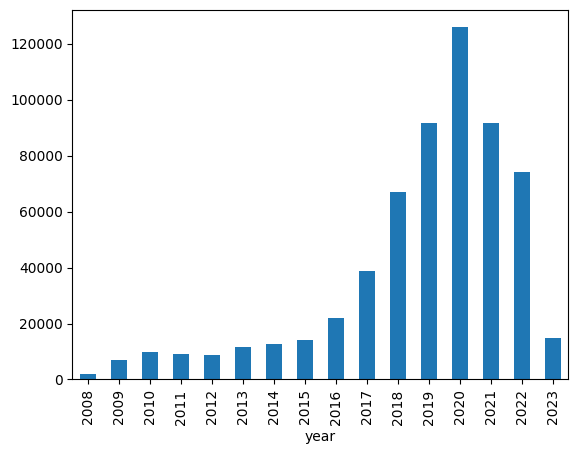

In [27]:
df['year'] = df['submission_time'].dt.year
reviews_per_year = df.groupby('year')['review_text'].count()
reviews_per_year.plot(kind='bar')

In [28]:
# unique values in columns skin_tone, hair_color and eye_color

df['skin_tone'].value_counts()

skin_tone
light          247191
fair           111875
lightMedium    106249
medium          36986
mediumTan       34428
fairLight       30612
tan             17698
deep            10821
rich             2890
olive            1055
porcelain         988
dark              296
notSureST          41
ebony               1
Name: count, dtype: int64

In [29]:
df['hair_color'].value_counts()

hair_color
brown       359188
blonde      106614
black        96649
auburn       16124
red          13718
brunette      6008
gray          2830
Name: count, dtype: int64

In [37]:
#get column names of the dataset

df.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd', 'year',
       'clean_review'],
      dtype='object')

In [30]:
df['eye_color'].value_counts()

eye_color
brown    381652
blue      91744
hazel     62501
green     62319
grey       2695
gray        220
Name: count, dtype: int64

In [31]:
# Save DataFrame to a CSV file
df.to_csv(r'D:\DEPI Data Engineer\__ Graduation Project\Data\new_data_for_powerBi.csv', index=False)

# **Preprocessing for NLP**

In [32]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

def clean_reviews(df, text_column):
    # Initialize necessary tools
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stopwords_list = stopwords.words('english')
    
    # Define the cleaning functions
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

    def remove_between_square_brackets(text):
        return re.sub(r'\[.*?\]', '', text)

    def remove_repeated_chars(text):
        pattern = re.compile(r'(.)\1{2,}')
        cleaned_text = pattern.sub(r'\1', text)
        return cleaned_text

    # Cleaning process
    df['clean_review'] = df[text_column].apply(strip_html)  # Remove HTML tags
    df['clean_review'] = df['clean_review'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation
    df['clean_review'] = df['clean_review'].str.replace(r'\d+', '', regex=True)  # Remove digits
    df['clean_review'] = df['clean_review'].str.replace(r'^\s+|\s+$', '', regex=True)  # Remove leading/trailing spaces
    df['clean_review'] = df['clean_review'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)  # Remove special characters
    df['clean_review'] = df['clean_review'].str.lower()  # Convert to lowercase
    df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))  # Remove stopwords
    df['clean_review'] = df['clean_review'].apply(remove_repeated_chars)  # Remove repeated characters
    df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))  # Lemmatization
    df['clean_review'] = df['clean_review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))  # Stemming

    return df

# Example usage
# Assuming you have a DataFrame `df` with a column 'review_text'
df = clean_reviews(df, 'review_text')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [31]:
df['clean_review'].head(15)

0     use nudestix citru clean balm makeup melt doub...
1     bought lip mask read review hype unfortun meet...
2     review titl say get excit get bed appli lip ma...
3     ive alway love formula long time honestli dont...
4     dri crack lip must week use learn alway bedsid...
5     scent isnt favourit work great put everi night...
6     ill give star nice packag love scent upon init...
7     use night im put makeup love way dont reappli ...
8     love stuff first sampl size sephora birthday g...
9     purchas sweet candi scent local sephora obsess...
10    product bit pricey use one scoop figur take lo...
11    use everi night morn work wonder never fail ma...
12    littl go long way love fragranc work great nig...
13    honestli excit got mail unfortun worth hype bo...
14    gummi bear mask smell absolut delici ye much l...
Name: clean_review, dtype: object

# **Perform Sentimae analysis**

In [32]:
# Perform sentiment analysis on reviews

from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_review'].apply(get_sentiment)

In [33]:
df['sentiment']

0         Positive
1         Positive
2          Neutral
3         Positive
4         Positive
            ...   
602125    Positive
602126    Negative
602127    Positive
602128    Positive
602129    Positive
Name: sentiment, Length: 601131, dtype: object

In [34]:
# Calculate percentage of positive, negative, and neutral reviews for each product and brand.
sentiment_percentage = df.groupby(['product_name', 'sentiment']).size().unstack(fill_value=0)
sentiment_percentage['Total'] = sentiment_percentage.sum(axis=1)
sentiment_percentage['Positive (%)'] = (sentiment_percentage['Positive'] / sentiment_percentage['Total']) * 100
sentiment_percentage['Negative (%)'] = (sentiment_percentage['Negative'] / sentiment_percentage['Total']) * 100
sentiment_percentage['Neutral (%)'] = (sentiment_percentage['Neutral'] / sentiment_percentage['Total']) * 100


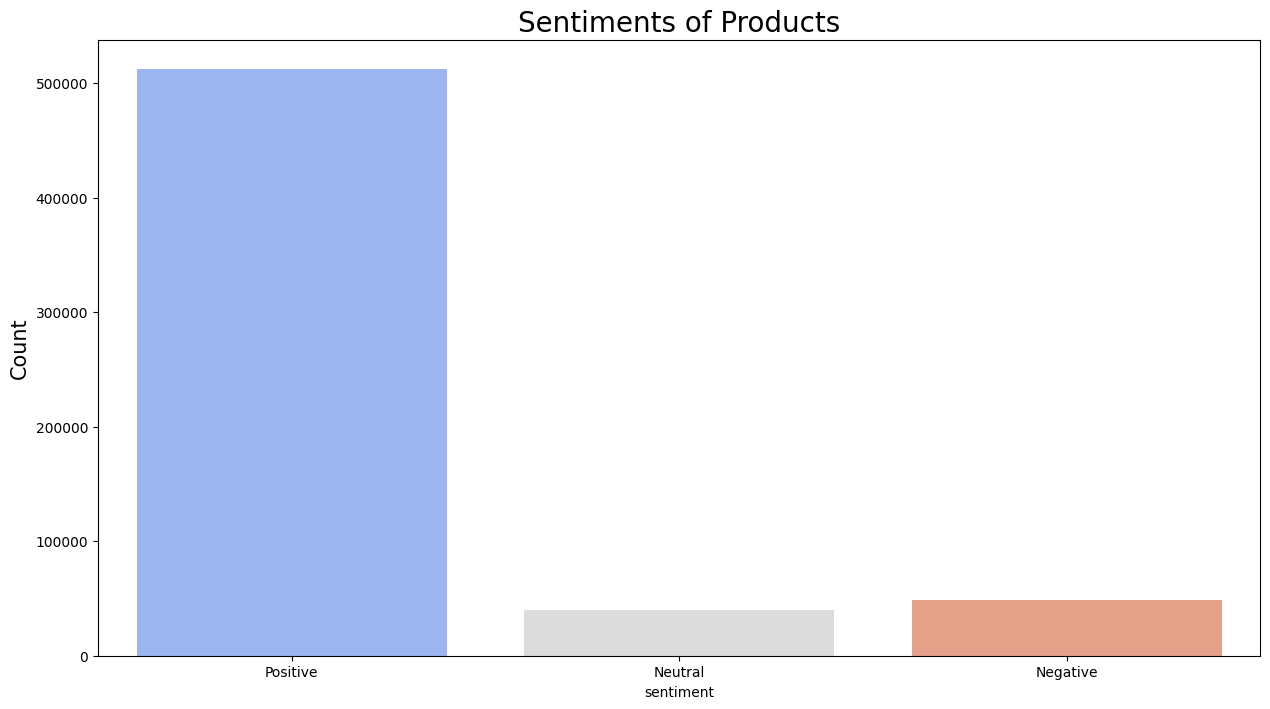

In [35]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Plot the sentiment analysis using seaborn countplot
sns.countplot(data=df, x='sentiment', palette='coolwarm')

# Set the title and labels
plt.title('Sentiments of Products', fontsize=20)
plt.ylabel('Count', fontsize=15)

# Show the plot
plt.show()


In [36]:
import matplotlib.pyplot as plt

# Create a mapping of products to numbers (or letters)
product_mapping = {product: f'P{i+1}' for i, product in enumerate(top_products.index)}

# Replace product names with their mapped values in the DataFrame
top_products_renamed = top_products.rename(index=product_mapping)

# Set larger figure size
plt.figure(figsize=(20, 10))

# Plot stacked bar chart with renamed products
top_products_renamed[['Positive (%)', 'Negative (%)', 'Neutral (%)']].plot(kind='bar', stacked=True)

# Set title and labels
plt.title('Sentiment Analysis of Top 10 Products', fontsize=20)
plt.xlabel('Product Number', fontsize=15)  # Change to 'Product Number'
plt.ylabel('Percentage', fontsize=15)
plt.xticks(rotation=45)

# Get legend
legend = plt.legend(title='Sentiment', fontsize=12)

# Set legend title fontsize
legend.get_title().set_fontsize('12')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the mapping key as a product reference
print("Product Mapping (Key):")
for real_name, mapped_name in product_mapping.items():
    print(f'{mapped_name}: {real_name}')


NameError: name 'top_products' is not defined

In [303]:
# Conclusion
best_product = sentiment_percentage['Positive (%)'].idxmax()
print(f"The product with most positive sentiments: {best_product}")

The product with most positive sentiments: Gentle Hydra-Gel Face Cleanser


In [304]:
sentiments = df['sentiment']
reviews = df['clean_review']
positive_words = ' '.join(reviews[sentiments == 'Positive'])
negative_words = ' '.join(reviews[sentiments == 'Negative'])

In [305]:
# Save DataFrame to a CSV file
df.to_csv(r'D:\DEPI Data Engineer\__ Graduation Project\Data\preprocessed_data.csv', index=False)